In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data=pd.read_csv(r"D:\machine_learning\data\titanic.csv")
data.shape

(891, 12)

In [127]:
data.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Karaic, Mr. Milan",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [128]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Imputing missing values

In [129]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Dealing with missing value of Embarked

In [130]:
data["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [131]:
data["Embarked"].fillna("S",inplace=True)

#### Dealing with missing values of Cabin

In [132]:
data.drop("Cabin",axis=1,inplace=True)

#### Dealing with missing values of Age

In [133]:
data["Name"].head(30)

0                               Braund, Mr. Owen Harris
1     Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                Heikkinen, Miss. Laina
3          Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                              Allen, Mr. William Henry
5                                      Moran, Mr. James
6                               McCarthy, Mr. Timothy J
7                        Palsson, Master. Gosta Leonard
8     Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                   Nasser, Mrs. Nicholas (Adele Achem)
10                      Sandstrom, Miss. Marguerite Rut
11                             Bonnell, Miss. Elizabeth
12                       Saundercock, Mr. William Henry
13                          Andersson, Mr. Anders Johan
14                 Vestrom, Miss. Hulda Amanda Adolfina
15                     Hewlett, Mrs. (Mary D Kingcome) 
16                                 Rice, Master. Eugene
17                         Williams, Mr. Charles

In [134]:
def filling_age(row,men,child):
        token=row["Name"].split()
        for i in token:
            if i=="Mr." or "Mrs.":
                return men
            elif i=="Master." or "Miss.":
                return child

In [135]:
men=np.mean(data[data["Age"]<19].Age)
child=np.mean(data[data["Age"]>=19].Age)
men,child

(10.71705035971223, 34.28782608695652)

In [136]:
data["Age"]=data.apply(lambda x:filling_age(x,men ,child) if pd.isnull(x["Age"]) else x["Age"] ,axis=1)

### Categorical variable Identification and correction

In [137]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object

In [138]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [139]:
categorical_variable=["Sex","Embarked"]
for i in categorical_variable:
    print("Value counts in ",i)
    print(data[i].value_counts())
    print("\n")

Value counts in  Sex
male      577
female    314
Name: Sex, dtype: int64


Value counts in  Embarked
S    646
C    168
Q     77
Name: Embarked, dtype: int64




### Dropping unneccessary features

In [140]:
data.drop(["PassengerId","Name","Ticket","Fare"],axis=1,inplace=True)

In [141]:
data=pd.get_dummies(data)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,0,1,0,0,1
1,1,1,38.0,1,0,1,0,1,0,0
2,1,3,26.0,0,0,1,0,0,0,1
3,1,1,35.0,1,0,1,0,0,0,1
4,0,3,35.0,0,0,0,1,0,0,1


In [142]:
data.shape

(891, 10)

### Implementing Logistic Regression

#### Normalising the data

In [143]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
columns=data.columns
data=scaler.fit_transform(data)
data=pd.DataFrame(data,columns=columns)
data.head()

,Survived,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.0,1.0,0.271174,0.125,0.0,0.0,1.0,0.0,0.0,1.0
1,1.0,0.0,0.472229,0.125,0.0,1.0,0.0,1.0,0.0,0.0
2,1.0,1.0,0.321438,0.000,0.0,1.0,0.0,0.0,0.0,1.0
3,1.0,0.0,0.434531,0.125,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,1.0,0.434531,0.000,0.0,0.0,1.0,0.0,0.0,1.0


#### Identify feature and target variable``

In [144]:
feature=data.drop("Survived",axis=1)
target=data["Survived"]

#### Dividing data into train and test data

In [145]:
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(feature ,target,random_state=100,stratify=target,test_size=0.2)

#### Importing neccessary ml algorithms

In [152]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.neighbors import KNeighborsClassifier as KNN

lr=LR()

In [153]:
lr.fit(train_x,train_y)
lr_train_predict=lr.predict(train_x)
lr.score(train_x,train_y)

0.7907303370786517

In [154]:
lr_test_predict=lr.predict(test_x)
lr.score(test_x,test_y)

0.776536312849162

In [162]:
from sklearn.metrics import f1_score
f1_train=f1_score(train_y,lr_train_predict)
print("F1 score of training set :",f1_train)
f1_test=f1_score(test_y,lr_test_predict)
print("F1 score of test set :",f1_test)

F1 score of training set : 0.7204502814258912
F1 score of test set : 0.7297297297297297


In [163]:
knn=KNN()
knn.fit(train_x,train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [164]:
knn.score(train_x,train_y)

0.8497191011235955

In [166]:
knn.score(test_x,test_y)

0.7877094972067039

In [181]:
error=[]
for i in range(1,100):
    knn=KNN(n_neighbors=i)
    knn.fit(train_x,train_y)
    error.append(knn.score(train_x,train_y)-knn.score(test_x,test_y))
    

Text(0, 0.5, 'Error')

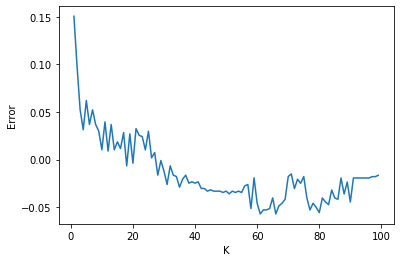

In [190]:
x=range(1,100)
plt.plot(x,error)
plt.xlabel("K")
plt.ylabel("Error")

Text(0, 0.5, 'Error')

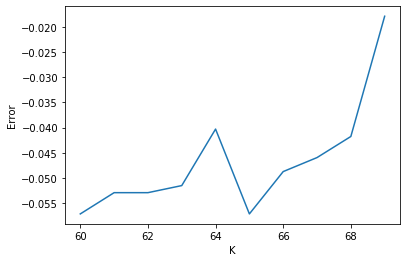

In [191]:
x=range(60,70)
plt.plot(x,error[60:70])
plt.xlabel("K")
plt.ylabel("Error")

In [187]:
knn=KNN(n_neighbors=65)
knn.fit(train_x,train_y)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=65, p=2,
                     weights='uniform')

In [188]:
knn.score(train_x,train_y)

0.7865168539325843

In [189]:
knn.score(test_x,test_y)

0.8268156424581006

In [222]:
dt=DT(max_depth=4)
dt.fit(train_x,train_y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [223]:
dt.score(train_x,train_y)

0.8356741573033708

In [224]:
dt.score(test_x,test_y)

0.8491620111731844

Note: In all the three model , Decision tress is the best to predict the<br>
    survival of person as it has maximum score.